In [1]:
# 


In [55]:
import numpy as np

# Reward Matrix
R = np.matrix([
    [-1,  10, -1, -1, -1, 20],
    [-1, 50, 10, -1,-1,  -1],
    [ -1, -1, 10, 10,-1,  -1],
    [-1, -1, -1, 10, 50 , -1],
    [-1, -1, -1, -1, 10, 50],
    [-1, -1, -1, -1, 0, 100]
])

# Initialize Q-Matrix
Q = np.matrix(np.zeros(R.shape))

# Parameters
gamma = 0.8  # Discount factor
alpha = 0.5  # Learning rate
num_episodes = 10000  # Training iterations

# Training the agent
for episode in range(num_episodes):
    state = np.random.randint(0, R.shape[0])  # Random initial state

    while True:
        # Find possible actions
        actions = np.where(R[state,] >= 0)[1]

        # Choose an action randomly
        action = np.random.choice(actions, 1)[0]

        # Get max Q-value for the next state
        next_state = action
        max_next_q = np.max(Q[next_state,])

        # Q-Learning formula
        Q[state, action] = Q[state, action] + alpha * (R[state, action] + gamma * max_next_q - Q[state, action])

        # Move to the next state
        state = next_state

        # End episode if goal state is reached
        if state == R.shape[0] - 1:
            break

# Normalize the Q-matrix
Q_normalized = Q / np.max(Q) * 100

# Display Results
print("Trained Q-Matrix:")
print(Q_normalized)

# Find the optimal path
def optimal_path(start_state):
    steps = [start_state]
    current_state = start_state

    while current_state != R.shape[0] - 1:
        next_state = int(np.argmax(Q[current_state,]))
        steps.append(next_state)
        current_state = next_state

    return steps

# Example: Start from state 0
print("Optimal Path:")
print(optimal_path(1))


Trained Q-Matrix:
[[  0.     46.864   0.      0.      0.     84.   ]
 [  0.     54.864  56.08    0.      0.      0.   ]
 [  0.      0.     56.08   67.6     0.      0.   ]
 [  0.      0.      0.     67.6    82.      0.   ]
 [  0.      0.      0.      0.     74.     90.   ]
 [  0.      0.      0.      0.     72.    100.   ]]
Optimal Path:
[1, 2, 3, 4, 5]


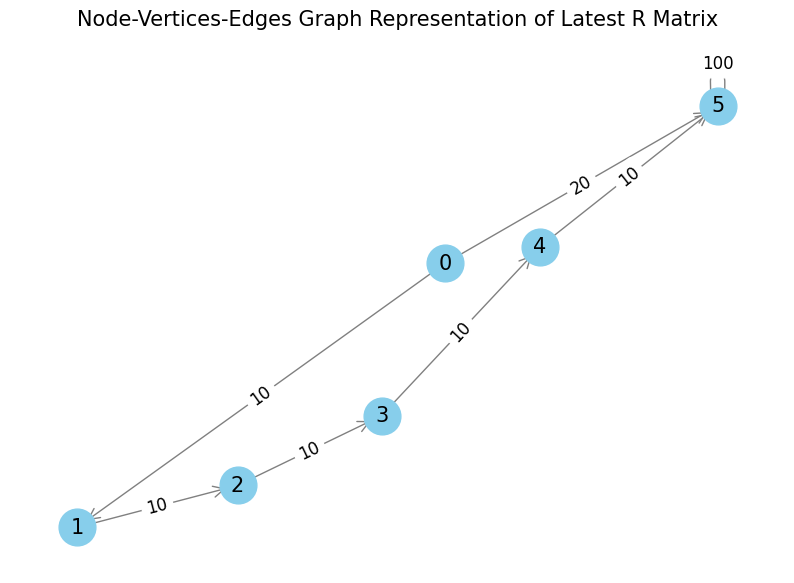

In [48]:
# Define the graph edges based on the newest reward matrix R
latest_edges = [
    (0, 1, 10), (0, 5, 20),
    (1, 2,10),
    (2, 3, 10),
    (3, 4, 10),
    (4, 5, 10),
    (5, 5, 100)
]

# Create a new directed graph
G_latest = nx.DiGraph()

# Add edges with weights to the graph
for edge in latest_edges:
    G_latest.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
pos_latest = nx.spring_layout(G_latest)  # Layout for nodes
plt.figure(figsize=(10, 7))

# Draw nodes and edges
nx.draw_networkx_nodes(G_latest, pos_latest, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G_latest, pos_latest, arrowstyle="->", arrowsize=20, edge_color="gray")
nx.draw_networkx_labels(G_latest, pos_latest, font_size=15, font_color="black")

# Add edge labels (weights)
edge_labels_latest = nx.get_edge_attributes(G_latest, 'weight')
nx.draw_networkx_edge_labels(G_latest, pos_latest, edge_labels=edge_labels_latest, font_size=12)

plt.title("Node-Vertices-Edges Graph Representation of Latest R Matrix", fontsize=15)
plt.axis("off")
plt.show()
